In [65]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

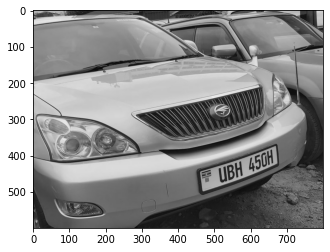

In [66]:
# Read in image, grayscale nd blur 
img = cv2.imread('img7.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

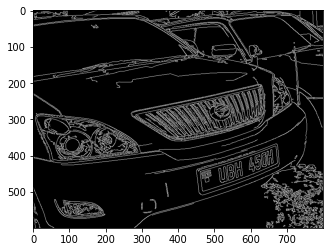

In [67]:
# Apply filter and find edges for localization
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [68]:
# Find contours and apply mask
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [69]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [70]:
location

array([[[670, 375]],

       [[462, 443]],

       [[467, 497]],

       [[672, 423]]], dtype=int32)

In [71]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

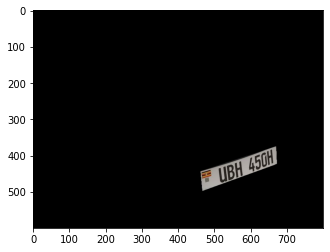

In [72]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [73]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

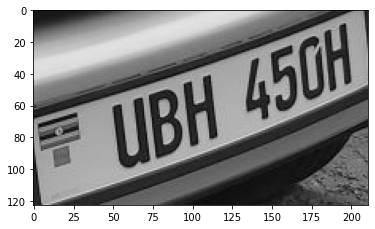

In [74]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [75]:
# Use Easy OCR To Read Text
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[113.93133264396633, 28.303865701552855],
   [203.36441177110243, -4.472833808207818],
   [221.06866735603367, 53.69613429844714],
   [131.63558822889757, 85.47283380820782]],
  'G5oh',
  0.10163938704506972),
 ([[35.48714644483792, 51.46658075657858],
   [119.53141703276872, 29.664621880772316],
   [132.51285355516208, 90.53341924342142],
   [48.468582967231285, 113.33537811922768]],
  'WBH',
  0.8272584370292746)]

In [91]:
text = result[1][-2] + " " + result[0][-2]

In [92]:
text

'WBH G5oh'